In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Global Variables

In [2]:
t=True
f=False

# Load Movies Datarame

In [3]:
movies_df = pd.read_csv('./data/movies.csv')

In [4]:
movies_df.drop(['Unnamed: 0'],axis=1,inplace=t)

In [5]:
movies_df.head(5)

adult                     backdrop_path  \
0  False  /5YZbUmjbMa3ClvSW1Wj3D6XGolb.jpg   
1  False  /4XM8DUTQb3lhLemJC51Jx4a2EuA.jpg   
2  False  /oqP1qEZccq5AD9TVTIaO6IGUj7o.jpg   
3  False  /woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg   
4  False  /zcySy6dnSmyqiichtDgO7AEeZoq.jpg   

                         belongs_to_collection     budget  \
0           Guardians of the Galaxy Collection  250000000   
1          The Fast and the Furious Collection  340000000   
2                                          NaN   60000000   
3  Transformers: Rise of the Beasts Collection  200000000   
4                                          NaN  110000000   

                               genres  \
0  Science Fiction, Adventure, Action   
1             Action, Crime, Thriller   
2          Fantasy, Action, Adventure   
3  Action, Adventure, Science Fiction   
4             Action, Drama, Thriller   

                                            homepage      id    imdb_id  \
0  https://www.marvel.com/movies/guardians-of-the...  447365  tt6791350   
1                             https://fastxmovie.com  385687  tt5433140   
2                              https://kotzmovie.com  455476  tt6528290   
3                  https://www.transformersmovie.com  667538  tt5090568   
4                    http://www.sanandreasmovie.com/  254128  tt2126355   

  original_language                    original_title  ...  \
0                en    Guardians of the Galaxy Vol. 3  ...   
1                en                            Fast X  ...   
2                en             Knights of the Zodiac  ...   
3                en  Transformers: Rise of the Beasts  ...   
4                en                       San Andreas  ...   

                                    spoken_languages    status  \
0                                            English  Released   
1  Español, Bahasa indonesia, English, Italiano, ...  Released   
2                                            English  Released   
3                                 , Español, English  Released   
4                                            English  Released   

                                             tagline  \
0                            Once more with feeling.   
1                        The end of the road begins.   
2                            Go beyond your destiny.   
3                                     Unite or fall.   
4  A rescue pilot survived an earthquake, this is...   

                              title  video vote_average  vote_count  \
0    Guardians of the Galaxy Vol. 3  False        8.160        2846   
1                            Fast X  False        7.365        2624   
2             Knights of the Zodiac  False        6.499         426   
3  Transformers: Rise of the Beasts  False        7.280         731   
4                       San Andreas  False        6.213        7768   

                                             credits  \
0  {'cast': [{'adult': False, 'gender': 2, 'id': ...   
1  {'cast': [{'adult': False, 'gender': 2, 'id': ...   
2  {'cast': [{'adult': False, 'gender': 2, 'id': ...   
3  {'cast': [{'adult': False, 'gender': 2, 'id': ...   
4  {'cast': [{'adult': False, 'gender': 2, 'id': ...   

                                                cast          director  
0  Chris Pratt, Zoe Saldaña, Dave Bautista, Karen...        James Gunn  
1  Vin Diesel, Michelle Rodriguez, Tyrese Gibson,...   Louis Leterrier  
2  Mackenyu, Madison Iseman, Diego Tinoco, Mark D...    Tomek Baginski  
3  Anthony Ramos, Dominique Fishback, Luna Lauren...  Steven Caple Jr.  
4  Dwayne Johnson, Alexandra Daddario, Carla Gugi...       Brad Peyton  

[5 rows x 28 columns]

# Which Data Values Containing

In [6]:
movies_df.iloc[0]

adult                                                                False
backdrop_path                             /5YZbUmjbMa3ClvSW1Wj3D6XGolb.jpg
belongs_to_collection                   Guardians of the Galaxy Collection
budget                                                           250000000
genres                                  Science Fiction, Adventure, Action
homepage                 https://www.marvel.com/movies/guardians-of-the...
id                                                                  447365
imdb_id                                                          tt6791350
original_language                                                       en
original_title                              Guardians of the Galaxy Vol. 3
overview                 Peter Quill, still reeling from the loss of Ga...
popularity                                                        5935.577
poster_path                               /r2J02Z2OpNTctfOSN1Ydgii51I3.jpg
production_companies     

# Wanted Columns for Model Training

In [7]:
taken_columns = ['id','title','adult','genres','original_language','overview','production_companies','release_date','runtime','tagline','vote_average','vote_count','cast','director']

In [8]:
movies_df = movies_df[taken_columns]
movies_df

id                             title  adult  \
0      447365    Guardians of the Galaxy Vol. 3  False   
1      385687                            Fast X  False   
2      455476             Knights of the Zodiac  False   
3      667538  Transformers: Rise of the Beasts  False   
4      254128                       San Andreas  False   
...       ...                               ...    ...   
7995  1046785                      Until Sunset  False   
7996   656690                The Social Dilemma  False   
7997   353069                      Mother's Day  False   
7998   203739                   Vampire Academy  False   
7999   300602                  Capture the Flag  False   

                                    genres original_language  \
0       Science Fiction, Adventure, Action                en   
1                  Action, Crime, Thriller                en   
2               Fantasy, Action, Adventure                en   
3       Action, Adventure, Science Fiction                en   
4                  Action, Drama, Thriller                en   
...                                    ...               ...   
7995                              TV Movie                nl   
7996                    Documentary, Drama                en   
7997                Comedy, Drama, Romance                en   
7998               Comedy, Action, Fantasy                en   
7999  Comedy, Animation, Adventure, Family                es   

                                               overview  \
0     Peter Quill, still reeling from the loss of Ga...   
1     Over many missions and against impossible odds...   
2     When a headstrong street orphan, Seiya, in sea...   
3     When a new threat capable of destroying the en...   
4     In the aftermath of a massive earthquake in Ca...   
...                                                 ...   
7995  With the very first day of high school right a...   
7996  This documentary-drama hybrid explores the dan...   
7997  Intersecting stories with different moms colli...   
7998  Rose, a rebellious half-vampire/half-human gua...   
7999  When the brave and determined 12-year-old Mike...   

                                   production_companies release_date  runtime  \
0               Marvel Studios, Kevin Feige Productions   2023-05-03      150   
1     Universal Pictures, Original Film, One Race, P...   2023-05-17      142   
2                         Stage 6 Films, Toei Animation   2023-04-27      113   
3     Skydance, Paramount, di Bonaventura Pictures, ...   2023-06-06      127   
4     New Line Cinema, Village Roadshow Pictures, Fl...   2015-05-27      114   
...                                                 ...          ...      ...   
7995                                  IJswater Films BV   2023-07-11       70   
7996  Exposure Labs, Argent Pictures, The Space Program   2020-01-26       94   
7997  Rice Films, Gulfstream Pictures, May Day Movie...   2016-04-28      118   
7998  Montford / Murphy Productions, Preger Entertai...   2014-02-07      104   
7999  4 Cats Pictures, Telefónica Studios, Los Rocke...   2015-08-28       94   

                                                tagline  vote_average  \
0                               Once more with feeling.         8.160   
1                           The end of the road begins.         7.365   
2                               Go beyond your destiny.         6.499   
3                                        Unite or fall.         7.280   
4     A rescue pilot survived an earthquake, this is...         6.213   
...                                                 ...           ...   
7995                                                NaN         0.000   
7996  The technology that connects us also controls us.         7.503   
7997         Celebrate the one day that connects us all         6.002   
7998                               They suck at school.         6.348   
7999                                                NaN     

# Data Preprocessing

In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8000 non-null   int64  
 1   title                 8000 non-null   object 
 2   adult                 8000 non-null   bool   
 3   genres                7966 non-null   object 
 4   original_language     8000 non-null   object 
 5   overview              7948 non-null   object 
 6   production_companies  7620 non-null   object 
 7   release_date          7981 non-null   object 
 8   runtime               8000 non-null   int64  
 9   tagline               6030 non-null   object 
 10  vote_average          8000 non-null   float64
 11  vote_count            8000 non-null   int64  
 12  cast                  7967 non-null   object 
 13  director              7946 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 820.4+ KB


In [10]:
movies_df.isnull().sum().sort_values(ascending=False) / movies_df.shape[0] * 100

tagline                 24.6250
production_companies     4.7500
director                 0.6750
overview                 0.6500
genres                   0.4250
cast                     0.4125
release_date             0.2375
id                       0.0000
title                    0.0000
adult                    0.0000
original_language        0.0000
runtime                  0.0000
vote_average             0.0000
vote_count               0.0000
dtype: float64

<Axes: >

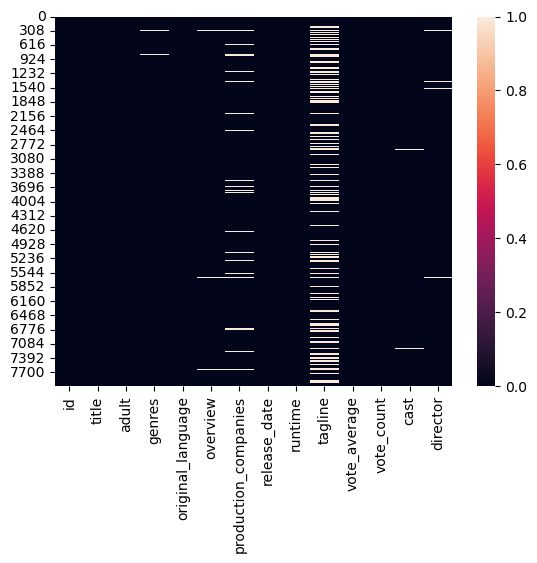

In [11]:
sns.heatmap(movies_df.isnull()) # Black indecating which have not null data

# getting year from release date

In [12]:
movies_df['release_date'][0]

'2023-05-03'

In [13]:
movies_df['release_date'].dtype

dtype('O')

In [14]:
from datetime import datetime

In [15]:
demo_date = '2015-11-20'
demo_date_format = "%Y-%m-%d"
demo_date = datetime.strptime(demo_date,demo_date_format)
print(demo_date.year)

2015


In [16]:
dummy_dates = ['2012-07-16','2019-08-15','2010-03-12','nan','2010-03-12']
dummy_year = []
for i in dummy_dates:
    #print(i)
    if i != 'nan':
        date_year = datetime.strptime(i, "%Y-%m-%d")
        dummy_year.append(date_year.year)
    else:
        dummy_year.append(None)
    
print(dummy_year)

[2012, 2019, 2010, None, 2010]


In [17]:
year = []
for i in movies_df['release_date']:
    if str(i) != 'nan':
        release = datetime.strptime(str(i), "%Y-%m-%d")
        year.append(str(release.year))
    else:
        year.append(None)
# print(year)
movies_df['year'] = year

In [18]:
movies_df.head(3)

id                           title  adult  \
0  447365  Guardians of the Galaxy Vol. 3  False   
1  385687                          Fast X  False   
2  455476           Knights of the Zodiac  False   

                               genres original_language  \
0  Science Fiction, Adventure, Action                en   
1             Action, Crime, Thriller                en   
2          Fantasy, Action, Adventure                en   

                                            overview  \
0  Peter Quill, still reeling from the loss of Ga...   
1  Over many missions and against impossible odds...   
2  When a headstrong street orphan, Seiya, in sea...   

                                production_companies release_date  runtime  \
0            Marvel Studios, Kevin Feige Productions   2023-05-03      150   
1  Universal Pictures, Original Film, One Race, P...   2023-05-17      142   
2                      Stage 6 Films, Toei Animation   2023-04-27      113   

                       tagline  vote_average  vote_count  \
0      Once more with feeling.         8.160        2846   
1  The end of the road begins.         7.365        2624   
2      Go beyond your destiny.         6.499         426   

                                                cast         director  year  
0  Chris Pratt, Zoe Saldaña, Dave Bautista, Karen...       James Gunn  2023  
1  Vin Diesel, Michelle Rodriguez, Tyrese Gibson,...  Louis Leterrier  2023  
2  Mackenyu, Madison Iseman, Diego Tinoco, Mark D...   Tomek Baginski  2023

In [19]:
movies_df['adult'] = movies_df['adult'].apply(lambda x: str(x))

In [20]:
movies_df.rename(columns={"vote_average": "rating"},inplace=True)

# Creating Tags for train ML model

In [21]:
movies_df['tags'] = movies_df['adult']+" "+movies_df['original_language']+" "+movies_df['tagline']+" "+movies_df['cast']+" "+movies_df['director']
movies_df['tags'].head(5)

0    False en Once more with feeling. Chris Pratt, ...
1    False en The end of the road begins. Vin Diese...
2    False en Go beyond your destiny. Mackenyu, Mad...
3    False en Unite or fall. Anthony Ramos, Dominiq...
4    False en A rescue pilot survived an earthquake...
Name: tags, dtype: object

In [22]:
movies_ml = movies_df[['id','title','rating','year','tags']]
movies_ml.head(5)

id                             title  rating  year  \
0  447365    Guardians of the Galaxy Vol. 3   8.160  2023   
1  385687                            Fast X   7.365  2023   
2  455476             Knights of the Zodiac   6.499  2023   
3  667538  Transformers: Rise of the Beasts   7.280  2023   
4  254128                       San Andreas   6.213  2015   

                                                tags  
0  False en Once more with feeling. Chris Pratt, ...  
1  False en The end of the road begins. Vin Diese...  
2  False en Go beyond your destiny. Mackenyu, Mad...  
3  False en Unite or fall. Anthony Ramos, Dominiq...  
4  False en A rescue pilot survived an earthquake...

# Lower Case tags for creating ml models

In [23]:
movies_ml['tags'] = movies_ml['tags'].apply(lambda x:str(x).lower())
movies_ml['tags'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_26160\2414055689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['tags'] = movies_ml['tags'].apply(lambda x:str(x).lower())


0    false en once more with feeling. chris pratt, ...
1    false en the end of the road begins. vin diese...
2    false en go beyond your destiny. mackenyu, mad...
3    false en unite or fall. anthony ramos, dominiq...
4    false en a rescue pilot survived an earthquake...
Name: tags, dtype: object

# Tokkenize words

In [24]:
from nltk.tokenize import word_tokenize

In [25]:
movies_ml['tokkens'] = movies_ml['tags'].apply(lambda x: word_tokenize(x))
movies_ml['tokkens'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_26160\482739753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['tokkens'] = movies_ml['tags'].apply(lambda x: word_tokenize(x))


0    [false, en, once, more, with, feeling, ., chri...
1    [false, en, the, end, of, the, road, begins, ....
2    [false, en, go, beyond, your, destiny, ., mack...
3    [false, en, unite, or, fall, ., anthony, ramos...
4    [false, en, a, rescue, pilot, survived, an, ea...
Name: tokkens, dtype: object

# removing stop words

In [26]:
from nltk.corpus import stopwords

In [27]:
import string 

In [28]:
stop_words = set(stopwords.words('english'))
special_chars = list(string.punctuation)

In [29]:
def removingStopWords(obj):
    stop_tags = []
    for w in obj:
        if w not in stop_words:
            if w not in special_chars:
                stop_tags.append(w)
    return stop_tags

In [30]:
check = removingStopWords(['this', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.'])
check

['sample', 'sentence', 'showing', 'stop', 'words', 'filtration']

In [31]:
movies_ml['without_stopwords'] = movies_ml['tokkens'].apply(removingStopWords)
movies_ml['without_stopwords'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_26160\1221274183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['without_stopwords'] = movies_ml['tokkens'].apply(removingStopWords)


0    [false, en, feeling, chris, pratt, zoe, saldañ...
1    [false, en, end, road, begins, vin, diesel, mi...
2    [false, en, go, beyond, destiny, mackenyu, mad...
3    [false, en, unite, fall, anthony, ramos, domin...
4    [false, en, rescue, pilot, survived, earthquak...
Name: without_stopwords, dtype: object

# applying steeming

In [32]:
from nltk.stem import WordNetLemmatizer

In [33]:
ls = WordNetLemmatizer()

In [34]:
words = ["program", "programs", "programmer", "programming", "programmers"]

In [35]:
for w in words:
    print(w, " : ", ls.lemmatize(w,pos='v'))

program  :  program
programs  :  program
programmer  :  programmer
programming  :  program
programmers  :  programmers


In [36]:
def stemword(obj):
    stemTxt = []
    for i in obj:
        stemTxt.append(ls.lemmatize(i,pos='v'))
    return stemTxt

In [37]:
check = stemword(["program", "programs", "programmer", "programming", "programmers"])
check

['program', 'program', 'programmer', 'program', 'programmers']

In [38]:
movies_ml['stemming'] = movies_ml['without_stopwords'].apply(stemword)
movies_ml['stemming'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_26160\3380387142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['stemming'] = movies_ml['without_stopwords'].apply(stemword)


0    [false, en, feel, chris, pratt, zoe, saldaña, ...
1    [false, en, end, road, begin, vin, diesel, mic...
2    [false, en, go, beyond, destiny, mackenyu, mad...
3    [false, en, unite, fall, anthony, ramos, domin...
4    [false, en, rescue, pilot, survive, earthquake...
Name: stemming, dtype: object

In [39]:
movies_ml.head(5)

id                             title  rating  year  \
0  447365    Guardians of the Galaxy Vol. 3   8.160  2023   
1  385687                            Fast X   7.365  2023   
2  455476             Knights of the Zodiac   6.499  2023   
3  667538  Transformers: Rise of the Beasts   7.280  2023   
4  254128                       San Andreas   6.213  2015   

                                                tags  \
0  false en once more with feeling. chris pratt, ...   
1  false en the end of the road begins. vin diese...   
2  false en go beyond your destiny. mackenyu, mad...   
3  false en unite or fall. anthony ramos, dominiq...   
4  false en a rescue pilot survived an earthquake...   

                                             tokkens  \
0  [false, en, once, more, with, feeling, ., chri...   
1  [false, en, the, end, of, the, road, begins, ....   
2  [false, en, go, beyond, your, destiny, ., mack...   
3  [false, en, unite, or, fall, ., anthony, ramos...   
4  [false, en, a, rescue, pilot, survived, an, ea...   

                                   without_stopwords  \
0  [false, en, feeling, chris, pratt, zoe, saldañ...   
1  [false, en, end, road, begins, vin, diesel, mi...   
2  [false, en, go, beyond, destiny, mackenyu, mad...   
3  [false, en, unite, fall, anthony, ramos, domin...   
4  [false, en, rescue, pilot, survived, earthquak...   

                                            stemming  
0  [false, en, feel, chris, pratt, zoe, saldaña, ...  
1  [false, en, end, road, begin, vin, diesel, mic...  
2  [false, en, go, beyond, destiny, mackenyu, mad...  
3  [false, en, unite, fall, anthony, ramos, domin...  
4  [false, en, rescue, pilot, survive, earthquake...

In [40]:
movies_ml["stem_tags"] = movies_ml['stemming'].apply(lambda x: " ".join(x))
movies_ml["stem_tags"].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_26160\68345207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml["stem_tags"] = movies_ml['stemming'].apply(lambda x: " ".join(x))


0    false en feel chris pratt zoe saldaña dave bau...
1    false en end road begin vin diesel michelle ro...
2    false en go beyond destiny mackenyu madison is...
3    false en unite fall anthony ramos dominique fi...
4    false en rescue pilot survive earthquake happe...
Name: stem_tags, dtype: object

# CountVectoriser // Bag Of Words

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
cv = CountVectorizer(max_features=5000)

In [43]:
vectors = cv.fit_transform(movies_ml['stem_tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
features = cv.get_feature_names_out()

In [46]:
keyword_recommend = pd.DataFrame(vectors,columns=features)
keyword_recommend

000  100  50  aaron  aasif  abbey  abbie  abbott  abby  abdul  ...  \
0       0    0   0      0      0      0      0       0     0      0  ...   
1       0    0   0      0      0      0      0       0     0      0  ...   
2       0    0   0      0      0      0      0       0     0      0  ...   
3       0    0   0      0      0      0      0       0     0      0  ...   
4       0    0   0      0      0      0      0       0     0      0  ...   
...   ...  ...  ..    ...    ...    ...    ...     ...   ...    ...  ...   
7995    0    0   0      0      0      0      0       0     0      0  ...   
7996    0    0   0      0      0      0      0       0     0      0  ...   
7997    0    0   0      0      1      0      0       0     0      0  ...   
7998    0    0   0      0      0      0      0       0     0      0  ...   
7999    0    0   0      0      0      0      0       0     0      0  ...   

      zimmerman  zoe  zooey  zoë  zucker  álvarez  ángel  åkerman  óscar  \
0             0    1      0    0       0        0      0        0      0   
1             0    0      0    0       0        0      0        0      0   
2             0    0      0    0       0        0      0        0      0   
3             0    0      0    0       0        0      0        0      0   
4             0    0      0    0       0        0      0        0      0   
...         ...  ...    ...  ...     ...      ...    ...      ...    ...   
7995          0    0      0    0       0        0      0        0      0   
7996          0    0      0    0       0        0      0        0      0   
7997          0    0      0    0       0        0      0        0      0   
7998          0    0      0    0       0        0      0        0      0   
7999          0    0      0    0       0        0      0        0      0   

      šerbedžija  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
7995           0  
7996           0  
7997           0  
7998           0  
7999           0  

[8000 rows x 5000 columns]

In [47]:
keyword_recommend['title'] = movies_ml['title']
keyword_recommend['id'] = movies_ml['id']

In [48]:
keyword_recommend.head(5)

000  100  50  aaron  aasif  abbey  abbie  abbott  abby  abdul  ...  zooey  \
0    0    0   0      0      0      0      0       0     0      0  ...      0   
1    0    0   0      0      0      0      0       0     0      0  ...      0   
2    0    0   0      0      0      0      0       0     0      0  ...      0   
3    0    0   0      0      0      0      0       0     0      0  ...      0   
4    0    0   0      0      0      0      0       0     0      0  ...      0   

   zoë  zucker  álvarez  ángel  åkerman  óscar  šerbedžija  \
0    0       0        0      0        0      0           0   
1    0       0        0      0        0      0           0   
2    0       0        0      0        0      0           0   
3    0       0        0      0        0      0           0   
4    0       0        0      0        0      0           0   

                              title      id  
0    Guardians of the Galaxy Vol. 3  447365  
1                            Fast X  385687  
2             Knights of the Zodiac  455476  
3  Transformers: Rise of the Beasts  667538  
4                       San Andreas  254128  

[5 rows x 5002 columns]

In [49]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [50]:
keyword_recommend.set_index('title',inplace=t)
keyword_recommend.head(5)

000  100  50  aaron  aasif  abbey  abbie  \
title                                                                        
Guardians of the Galaxy Vol. 3      0    0   0      0      0      0      0   
Fast X                              0    0   0      0      0      0      0   
Knights of the Zodiac               0    0   0      0      0      0      0   
Transformers: Rise of the Beasts    0    0   0      0      0      0      0   
San Andreas                         0    0   0      0      0      0      0   

                                  abbott  abby  abdul  abe  abel  abercrombie  \
title                                                                           
Guardians of the Galaxy Vol. 3         0     0      0    0     0            1   
Fast X                                 0     0      0    0     0            0   
Knights of the Zodiac                  0     0      0    0     0            0   
Transformers: Rise of the Beasts       0     0      0    0     0            0   
San Andreas                            0     0      0    0     0            0   

                                  abigail  abraham  abrahams  abrams  ace  \
title                                                                       
Guardians of the Galaxy Vol. 3          0        0         0       0    0   
Fast X                                  0        0         0       0    0   
Knights of the Zodiac                   0        0         0       0    0   
Transformers: Rise of the Beasts        0        0         0       0    0   
San Andreas                             0        0         0       0    0   

                                  acevedo  ackerman  acosta  acres  act  \
title                                                                     
Guardians of the Galaxy Vol. 3          0         0       0      0    0   
Fast X                                  0         0       0      0    0   
Knights of the Zodiac                   0         0       0      0    0   
Transformers: Rise of the Beasts        0         0       0      0    0   
San Andreas                             0         0       0      0    0   

                                  action  ada  adair  adam  adams  adamson  \
title                                                                        
Guardians of the Galaxy Vol. 3         0    0      0     0      0        0   
Fast X                                 0    0      0     0      0        0   
Knights of the Zodiac                  0    0      0     0      0        0   
Transformers: Rise of the Beasts       0    0      0     0      0        0   
San Andreas                            0    0      0     0      0        0   

                                  adamthwaite  addison  addy  adele  adewale  \
title                                                                          
Guardians of the Galaxy Vol. 3              0        0     0      0        0   
Fast X                                      0        0     0      0        0   
Knights of the Zodiac                       0        0     0      0        0   
Transformers: Rise of the Beasts            0        0     0      0        0   
San Andreas                                 0        0     0      0        0   

                                  adkins  adler  adlon  adria  adrian  \
title                                                                   
Guardians of the Galaxy Vol. 3         0      0      0      0       0   
Fast X                                 0      0      0      0       0   
Knights of the Zodiac                  0      0      0      0       0   
Transformers: Rise of the Beasts       0      0      0      0       0   
San Andreas                            0      0      0      0       0   

                                  adriana  adrien  adrienne  adventure  afemo  \
title                                                                           
Guardians of the Galaxy Vol. 3          1       0         0          0 

# title of movie Indexes

In [51]:
title_dataframe = pd.DataFrame(keyword_recommend.index)
title_dataframe

title
0                        Guardians of the Galaxy Vol. 3
1                                                Fast X
2                                 Knights of the Zodiac
3                      Transformers: Rise of the Beasts
4                                           San Andreas
5                                      Sound of Freedom
6                                Confidential Informant
7                                               Sheroes
8                                     The Darkest Minds
9                   Spider-Man: Across the Spider-Verse
10                                 John Wick: Chapter 4
11                              Insidious: The Last Key
12                          The Super Mario Bros. Movie
13                               A Good Day to Die Hard
14                                            Elemental
15                        War of the Worlds: The Attack
16                                         Extraction 2
17                              Insidious: The Red Door
18                                               Barbie
19            Mortal Kombat Legends: Scorpion's Revenge
20               The Conjuring: The Devil Made Me Do It
21                                              Gantz:O
22        Mission: Impossible - Dead Reckoning Part One
23          Mortal Kombat Legends: Battle of the Realms
24                                        Shadow Master
25                                   The Little Mermaid
26                                             My Fault
27                                            The Flash
28                             Avatar: The Way of Water
29                                          Skinamarink
30                                       Run Rabbit Run
31                                             Bed Rest
32                                             Hypnotic
33                                       Evil Dead Rise
34                                      The Black Demon
35                                            Cold Eyes
36                                   The Wrath of Becky
37                                  The Pope's Exorcist
38                                Detective vs. Sleuths
39                           Guy Ritchie's The Covenant
40                            iNumber Number: Jozi Gold
41                    Ant-Man and the Wasp: Quantumania
42                                                 Sisu
43                                          Eradication
44                                               Nimona
45                Indiana Jones and the Dial of Destiny
46                         Puss in Boots: The Last Wish
47                                            Creed III
48                             Shazam! Fury of the Gods
49                       Scooby-Doo! The Mystery Begins
50                    Through My Window: Across the Sea
51                                              Encanto
52                                            The Lorax
53                    Spider-Man: Into the Spider-Verse
54                                                   It
55                                            Scream VI
56               Black Clover: Sword of the Wizard King
57                                         The Out-Laws
58                 The Angry Black Girl and Her Monster
59                              Spider-Man: No Way Home
60                                        Los bastardos
61                                          The Mount 2
62                    Scooby-Doo! and the Witch's Ghost
63                       Black Panther: Wakanda Forever
64                       Accident Man: Hitman's Holiday
65                                PAW Patrol: The Movie
66                                               Suzume
67                                              Ghosted
68                                             Garfield
69                                               Ambush
70                                           Black Adam
71                

# movies recomendation using knn

In [52]:
from sklearn.neighbors import NearestNeighbors

In [53]:
keyword_recommend.iloc[[1]].index

Index(['Fast X'], dtype='object', name='title')

In [54]:
keyword_recommend.iloc[[1]]

000  100  50  aaron  aasif  abbey  abbie  abbott  abby  abdul  abe  \
title                                                                        
Fast X    0    0   0      0      0      0      0       0     0      0    0   

        abel  abercrombie  abigail  abraham  abrahams  abrams  ace  acevedo  \
title                                                                         
Fast X     0            0        0        0         0       0    0        0   

        ackerman  acosta  acres  act  action  ada  adair  adam  adams  \
title                                                                   
Fast X         0       0      0    0       0    0      0     0      0   

        adamson  adamthwaite  addison  addy  adele  adewale  adkins  adler  \
title                                                                        
Fast X        0            0        0     0      0        0       0      0   

        adlon  adria  adrian  adriana  adrien  adrienne  adventure  afemo  \
title                                                                       
Fast X      0      0       0        0       0         0          0      0   

        affleck  afraid  agbaje  age  agnes  aguilar  ah  ahern  ahmed  ahn  \
title                                                                         
Fast X        0       0       0    0      0        0   0      0      0    0   

        ai  aida  aidan  aiden  aiello  aimee  airlie  aisha  ajay  aki  \
title                                                                     
Fast X   0     0      0      0       0      0       0      0     0    0   

        akiko  akinnuoye  akio  akira  akiva  al  alain  alan  alana  alanna  \
title                                                                          
Fast X      0          0     0      0      0   0      0     1      0       0   

        alastair  alazraqui  alba  albert  alberto  albright  alda  alden  \
title                                                                       
Fast X         0          0     0       0        0         0     0      0   

        aldo  alec  alejandro  aleksandar  aleksandr  aleksey  alessandra  \
title                                                                       
Fast X     0     0          0           0          0        0           0   

        alessandro  alessio  alex  alexa  alexander  alexandra  alexandre  \
title                                                                       
Fast X           0        0     0      0          1          0          0   

        alexia  alexis  alf  alfie  alfonso  alfre  alfred  alfredo  ali  \
title                                                                      
Fast X       0       0    0      0        0      0       0        0    0   

        alia  alice  alicia  alina  alisa  alisha  alison  alistair  alive  \
title                                                                        
Fast X     0      0       0      0      0       0       0         0      0   

        alix  allan  allen  allie  allison  ally  alma  almeida  alone  \
title                                                                    
Fast X     0      1      0      0        0     0     0        1      0   

        alonso  alonzo  altman  alton  alvarado  alvarez  alvin  always  alyn  \
title                                                                           
Fast X       0       0       0      0         0        0      0       0     0   

        alyson  alyssa  amanda  amber  ambrose  ambrosio  amelia  america  \
title                                                                       
Fast X       0       0       0      0        0         0       0        0   

        american  ames  ami  amir  amos  amy  ana  anastasia  anders  \
title                                                                  
Fast X         0     0    0     0     0    0    0          0       0   

        andersen  anderson  andersson  andrade  andre  andrea  andr

In [59]:
keyword_recommend[(keyword_recommend['id']==385687)]

000  100  50  aaron  aasif  abbey  abbie  abbott  abby  abdul  abe  \
title                                                                        
Fast X    0    0   0      0      0      0      0       0     0      0    0   

        abel  abercrombie  abigail  abraham  abrahams  abrams  ace  acevedo  \
title                                                                         
Fast X     0            0        0        0         0       0    0        0   

        ackerman  acosta  acres  act  action  ada  adair  adam  adams  \
title                                                                   
Fast X         0       0      0    0       0    0      0     0      0   

        adamson  adamthwaite  addison  addy  adele  adewale  adkins  adler  \
title                                                                        
Fast X        0            0        0     0      0        0       0      0   

        adlon  adria  adrian  adriana  adrien  adrienne  adventure  afemo  \
title                                                                       
Fast X      0      0       0        0       0         0          0      0   

        affleck  afraid  agbaje  age  agnes  aguilar  ah  ahern  ahmed  ahn  \
title                                                                         
Fast X        0       0       0    0      0        0   0      0      0    0   

        ai  aida  aidan  aiden  aiello  aimee  airlie  aisha  ajay  aki  \
title                                                                     
Fast X   0     0      0      0       0      0       0      0     0    0   

        akiko  akinnuoye  akio  akira  akiva  al  alain  alan  alana  alanna  \
title                                                                          
Fast X      0          0     0      0      0   0      0     1      0       0   

        alastair  alazraqui  alba  albert  alberto  albright  alda  alden  \
title                                                                       
Fast X         0          0     0       0        0         0     0      0   

        aldo  alec  alejandro  aleksandar  aleksandr  aleksey  alessandra  \
title                                                                       
Fast X     0     0          0           0          0        0           0   

        alessandro  alessio  alex  alexa  alexander  alexandra  alexandre  \
title                                                                       
Fast X           0        0     0      0          1          0          0   

        alexia  alexis  alf  alfie  alfonso  alfre  alfred  alfredo  ali  \
title                                                                      
Fast X       0       0    0      0        0      0       0        0    0   

        alia  alice  alicia  alina  alisa  alisha  alison  alistair  alive  \
title                                                                        
Fast X     0      0       0      0      0       0       0         0      0   

        alix  allan  allen  allie  allison  ally  alma  almeida  alone  \
title                                                                    
Fast X     0      1      0      0        0     0     0        1      0   

        alonso  alonzo  altman  alton  alvarado  alvarez  alvin  always  alyn  \
title                                                                           
Fast X       0       0       0      0         0        0      0       0     0   

        alyson  alyssa  amanda  amber  ambrose  ambrosio  amelia  america  \
title                                                                       
Fast X       0       0       0      0        0         0       0        0   

        american  ames  ami  amir  amos  amy  ana  anastasia  anders  \
title                                                                  
Fast X         0     0    0     0     0    0    0          0       0   

        andersen  anderson  andersson  andrade  andre  andrea  andr

In [56]:
knn = NearestNeighbors()

In [57]:
knn.fit(keyword_recommend)

NearestNeighbors()

In [58]:
distance , index = knn.kneighbors(keyword_recommend[(keyword_recommend['id']==385687)].index,n_neighbors=10)

C:\Users\navne\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'Fast X'

In [ ]:
rec_movie_name = []
for i in index[0]:
    rec_movie_name.append(title_dataframe['title'].iloc[[i]].values)
rec_movie_name = np.ravel(rec_movie_name).tolist()

In [ ]:
# keyword_recommend.fin

In [ ]:
rec_movie_name